<a href="https://colab.research.google.com/github/rsbaye/Projects/blob/main/Project_September_July_with_svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model as lm
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, explained_variance_score
from sklearn.model_selection import GridSearchCV

In [5]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment, it should be under CS254/CS254-Assignments/netid-A2
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS254/CS254-Project-Shared-Folder ' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Short Proposal.docx', 'Gatesburg_farm_data_overview.pptx', 'Gatesburg_Farm_RF.ipynb', 'sep2021_yield.csv', 'Project Proposal Presentation.pptx', 'CS254 Project Proposal Report.docx', 'july2021_yield.csv', 'CS254 Final Project Report.docx', 'Task List for Final Report.docx', 'sep2021_yieldcorrect.csv', 'Gatesburg_farm_data', 'Video recordings']


In [6]:
path = GOOGLE_DRIVE_PATH + '/sep2021_yieldcorrect.csv'
data = pd.read_csv(path, header=0)
display(data.head())


,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,cec,som,slope,has,yield
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data = data.dropna()
data = data.reset_index(drop=True)
print(data)

           b1       b2       b3       b4       b5       b6       b7       b8  \
0     0.39265  0.43430  0.43465  0.47110  0.49640  0.60135  0.66100  0.63980   
1     0.43775  0.43235  0.43560  0.47305  0.52060  0.62020  0.67380  0.64280   
2     0.39265  0.40095  0.40775  0.44515  0.47635  0.58325  0.65445  0.62730   
3     0.46970  0.46285  0.46725  0.51335  0.54540  0.63195  0.68865  0.66350   
4     0.43775  0.43065  0.44560  0.49390  0.51135  0.61665  0.67325  0.65515   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3279  0.13625  0.10490  0.09440  0.06095  0.09970  0.35655  0.50680  0.46800   
3280  0.13625  0.10510  0.09555  0.05950  0.10490  0.37815  0.52695  0.48075   
3281  0.13625  0.10625  0.09600  0.06530  0.09085  0.29455  0.43855  0.38945   
3282  0.13625  0.10660  0.09595  0.06115  0.09085  0.29455  0.43855  0.45600   
3283  0.13625  0.10675  0.09980  0.06180  0.09970  0.35655  0.50680  0.50125   

           b9      b10      b11      b1

In [8]:
data.describe()


,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,cec,som,slope,has,yield
count,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000
mean,0.331102,0.322474,0.315502,0.325706,0.353212,0.476595,0.546739,0.536028,0.579841,0.225347,0.407422,0.323942,15.904009,2.549762,3.199136,18.822341,194.729586
std,0.098010,0.117696,0.120381,0.142811,0.140674,0.111247,0.095133,0.094951,0.095185,0.056391,0.124123,0.120183,1.467918,0.305829,1.426890,4.515868,40.959023
min,0.136250,0.102500,0.090200,0.057750,0.084400,0.214300,0.284250,0.247950,0.302000,0.109950,0.129600,0.065800,11.818021,1.926432,0.052575,7.342926,28.365999
25%,0.251850,0.220550,0.211137,0.202550,0.230550,0.381787,0.476900,0.467688,0.515150,0.177650,0.309987,0.231837,14.851859,2.322493,2.165831,15.374481,172.003090
50%,0.338100,0.337250,0.331475,0.344500,0.373550,0.490450,0.551150,0.541575,0.586850,0.227300,0.432075,0.351400,15.856061,2.527767,3.156906,19.344727,200.843063
75%,0.408950,0.418125,0.412825,0.441600,0.466550,0.562900,0.615700,0.606150,0.645963,0.270350,0.502638,0.416863,16.935305,2.744267,4.100826,22.034508,225.607456
max,0.519750,0.560850,0.561300,0.618450,0.633000,0.706300,0.752800,0.751750,0.783450,0.335500,0.631300,0.530300,22.209530,3.980005,9.811869,30.872009,292.407745


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b1      3284 non-null   float64
 1   b2      3284 non-null   float64
 2   b3      3284 non-null   float64
 3   b4      3284 non-null   float64
 4   b5      3284 non-null   float64
 5   b6      3284 non-null   float64
 6   b7      3284 non-null   float64
 7   b8      3284 non-null   float64
 8   b9      3284 non-null   float64
 9   b10     3284 non-null   float64
 10  b11     3284 non-null   float64
 11  b12     3284 non-null   float64
 12  cec     3284 non-null   float64
 13  som     3284 non-null   float64
 14  slope   3284 non-null   float64
 15  has     3284 non-null   float64
 16  yield   3284 non-null   float64
dtypes: float64(17)
memory usage: 436.3 KB


In [10]:
print(data.dtypes)

b1       float64
b2       float64
b3       float64
b4       float64
b5       float64
b6       float64
b7       float64
b8       float64
b9       float64
b10      float64
b11      float64
b12      float64
cec      float64
som      float64
slope    float64
has      float64
yield    float64
dtype: object


In [11]:
# Split into training and test data
train, test = train_test_split(data, test_size=0.2, random_state= 23)

X_test=test.iloc[:,0:data.shape[1]-1]
Y_test=test.iloc[:,data.shape[1]-1:data.shape[1]]

X_train=train.iloc[:,0:train.shape[1]-1]
Y_train=train.iloc[:,train.shape[1]-1:train.shape[1]]



In [12]:
C_range = np.logspace(-2, 2, num = 7)
gamma_range = np.logspace (-2, 2, num = 7)


results = np.zeros((len(C_range), len(gamma_range)))

for i, C in enumerate(C_range):
  for j, gamma in enumerate(gamma_range):
    svr = SVR(C= C, gamma = gamma)
    svr.fit(X_train, Y_train)

    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)

    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)


    results[i, j] = test_mse


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

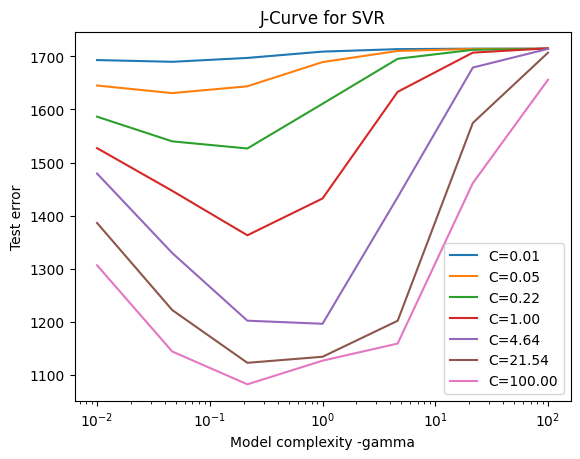

In [13]:
plt.figure()
plt.title("J-Curve for SVR")
plt.xlabel("Model complexity -gamma")
plt.ylabel("Test error")

for i, C in enumerate(C_range):
    plt.semilogx(gamma_range, results[i], label="C={:.2f}".format(C))
plt.legend()
plt.show()

Seems like when c= 100, we get a minimum test error with a model complexity of 1/10. 

In [ ]:

# define a list of kernel functions to loop through
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# define a range of values for the C hyperparameter
C_range = np.logspace(-2, 2, num=7)

# define a range of values for the gamma hyperparameter
gamma_range = np.logspace(-2, 2, num=7)

# create a dictionary of hyperparameters to search over
param_grid = {'C': C_range, 'gamma': gamma_range}

# create a grid search object
grid_search = GridSearchCV(SVR(kernel="rbf"), param_grid=param_grid)

# fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# print the best hyperparameters and score
print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {:.2f}'.format(grid_search.best_score_))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results_train = {}
results_test = {}

for kernel in kernels:
    svr = SVR(kernel=kernel, C=21.54, gamma="auto")
    svr.fit(X_train, Y_train)

    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    mae_train = mean_absolute_error(Y_train, y_train_pred)
    medae_train = median_absolute_error(Y_train, y_train_pred)
    r2_train = r2_score(Y_train, y_train_pred)
    evs_train = explained_variance_score(Y_train, y_train_pred)

    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    mae_test = mean_absolute_error(Y_test, y_test_pred)
    medae_test = median_absolute_error(Y_test, y_test_pred)
    r2_test = r2_score(Y_test, y_test_pred)
    evs_test = explained_variance_score(Y_test, y_test_pred)

    results_train[kernel] = {'R2': r2_train, 'Root mean squared error': rmse_train, 'MAE': mae_train, 'MedAE': medae_train, 'EVS': evs_train}
    results_test[kernel] = {'R2': r2_test, 'Root mean squared error': rmse_test, 'MAE': mae_test, 'MedAE': medae_test, 'EVS': evs_test}

# print the results
for kernel, metrics in results_train.items():
    print('Training results for kernel {}:'.format(kernel))
    for metric, value in metrics.items():
        print('{}: {:.2f}'.format(metric, value))
    print('\n')

for kernel, metrics in results_test.items():
    print('Test results for kernel {}:'.format(kernel))
    for metric, value in metrics.items():
        print('{}: {:.2f}'.format(metric, value))
    print('\n')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training results for kernel linear:
R2: 0.11
Root mean squared error: 38.70
MAE: 27.32
MedAE: 19.90
EVS: 0.13


Training results for kernel poly:
R2: 0.20
Root mean squared error: 36.55
MAE: 25.09
MedAE: 17.72
EVS: 0.22


Training results for kernel rbf:
R2: 0.23
Root mean squared error: 35.93
MAE: 25.07
MedAE: 18.10
EVS: 0.25


Training results for kernel sigmoid:
R2: -0.02
Root mean squared error: 41.41
MAE: 31.78
MedAE: 26.17
EVS: 0.00


Test results for kernel linear:
R2: 0.14
Root mean squared error: 37.84
MAE: 26.67
MedAE: 19.78
EVS: 0.17


Test results for kernel poly:
R2: 0.27
Root mean squared error: 34.96
MAE: 24.19
MedAE: 18.30
EVS: 0.29


Test results for kernel rbf:
R2: 0.29
Root mean squared error: 34.37
MAE: 23.89
MedAE: 18.40
EVS: 0.32


Test results for kernel sigmoid:
R2: -0.02
Root mean squared error: 41.41
MAE: 31.95
MedAE: 26.59
EVS: 0.00




Ignore below

In [ ]:

# Split into training and test data
train, test = train_test_split(data, test_size=0.2, random_state= 23)

X_test=test.iloc[:,0:data.shape[1]-1]
Y_test=test.iloc[:,data.shape[1]-1:data.shape[1]]

X_train=train.iloc[:,0:train.shape[1]-1]
Y_train=train.iloc[:,train.shape[1]-1:train.shape[1]]


In [ ]:
model = SVR(kernel="rbf", C=21.54, gamma="auto")
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=21.54, gamma='auto')

In [ ]:
Y_pred = model.predict(X_train)
Y_pred

array([203.1613659 , 234.47959956, 202.50349001, ..., 193.03295398,
       220.33558074, 220.18196386])

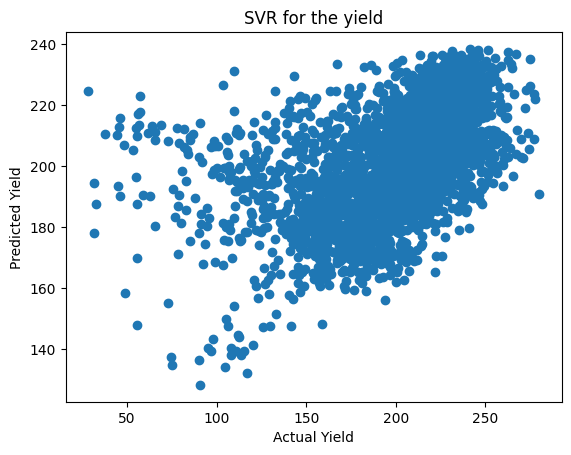

In [ ]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("SVR for the yield")
plt.show()

In [ ]:
path = GOOGLE_DRIVE_PATH + "/july2021_yield.csv"
data = pd.read_csv(path, header=0)
display(data.head())


,Unnamed: 0,id,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,cec,som,slope,has,yield
0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna()
data = data.reset_index(drop=True)
print(data)

      Unnamed: 0    id       b1       b2       b3       b4       b5       b6  \
0             67    67  0.13820  0.43430  0.43465  0.47110  0.49640  0.60135   
1            148   148  0.13255  0.43235  0.43560  0.47305  0.52060  0.62020   
2            149   149  0.13820  0.40095  0.40775  0.44515  0.47635  0.58325   
3            228   228  0.12825  0.46285  0.46725  0.51335  0.54540  0.63195   
4            229   229  0.13255  0.43065  0.44560  0.49390  0.51135  0.61665   
...          ...   ...      ...      ...      ...      ...      ...      ...   
3279        7319  7319  0.13015  0.10490  0.09440  0.06095  0.09970  0.35655   
3280        7320  7320  0.13015  0.10510  0.09555  0.05950  0.10490  0.37815   
3281        7399  7399  0.13015  0.10625  0.09600  0.06530  0.09085  0.29455   
3282        7400  7400  0.13015  0.10660  0.09595  0.06115  0.09085  0.29455   
3283        7401  7401  0.13015  0.10675  0.09980  0.06180  0.09970  0.35655   

           b7       b8       b9      b1

In [ ]:
# Split into training and test data
train, test = train_test_split(data, test_size=0.2, random_state= 23)

X_test=test.iloc[:,0:data.shape[1]-1]
y_test=test.iloc[:,data.shape[1]-1:data.shape[1]]

X_train=train.iloc[:,0:train.shape[1]-1]
y_train=train.iloc[:,train.shape[1]-1:train.shape[1]]


In [ ]:
C_range = np.logspace(-2, 2, num = 7)
gamma_range = np.logspace (-2, 2, num = 7)


results = np.zeros((len(C_range), len(gamma_range)))

for i, C in enumerate(C_range):
  for j, gamma in enumerate(gamma_range):
    svr = SVR(C= C, gamma = gamma)
    svr.fit(X_train, y_train)

    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)


    results[i, j] = test_mse


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

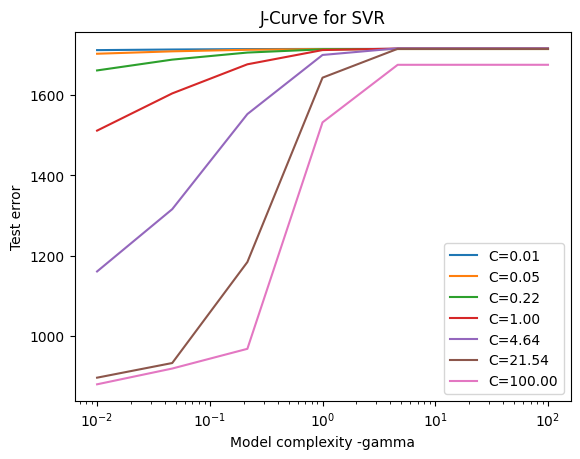

In [ ]:
plt.figure()
plt.title("J-Curve for SVR")
plt.xlabel("Model complexity -gamma")
plt.ylabel("Test error")

for i, C in enumerate(C_range):
    plt.semilogx(gamma_range, results[i], label="C={:.2f}".format(C))
plt.legend()
plt.show()

In [ ]:

# define a list of kernel functions to loop through
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# define a range of values for the C hyperparameter
C_range = np.logspace(-2, 2, num=7)

# define a range of values for the gamma hyperparameter
gamma_range = np.logspace(-2, 2, num=7)

# create a dictionary of hyperparameters to search over
param_grid = {'C': C_range, 'gamma': gamma_range}

# create a grid search object
grid_search = GridSearchCV(SVR(kernel="rbf"), param_grid=param_grid)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and score
print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {:.2f}'.format(grid_search.best_score_))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best hyperparameters: {'C': 100.0, 'gamma': 0.046415888336127774}
Best score: 0.42


In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results_train = {}
results_test = {}

for kernel in kernels:
    svr = SVR(kernel=kernel, C=100, gamma="auto")
    svr.fit(X_train, y_train)

    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    medae_train = median_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    evs_train = explained_variance_score(y_train, y_train_pred)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    medae_test = median_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    evs_test = explained_variance_score(y_test, y_test_pred)

    results_train[kernel] = {'R2': r2_train, 'Root mean squared error': rmse_train, 'MAE': mae_train, 'MedAE': medae_train, 'EVS': evs_train}
    results_test[kernel] = {'R2': r2_test, 'Root mean squared error': rmse_test, 'MAE': mae_test, 'MedAE': medae_test, 'EVS': evs_test}

# print the results
for kernel, metrics in results_train.items():
    print('Training results for kernel {}:'.format(kernel))
    for metric, value in metrics.items():
        print('{}: {:.2f}'.format(metric, value))
    print('\n')

for kernel, metrics in results_test.items():
    print('Test results for kernel {}:'.format(kernel))
    for metric, value in metrics.items():
        print('{}: {:.2f}'.format(metric, value))
    print('\n')


NameError: ignored